In [148]:
import numpy as np
import pandas as pd

In [149]:
df = pd.read_csv('spam.csv',encoding='ISO-8859-1')

In [150]:
df.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


## Data Cleaning

In [151]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   v1          5572 non-null   object
 1   v2          5572 non-null   object
 2   Unnamed: 2  50 non-null     object
 3   Unnamed: 3  12 non-null     object
 4   Unnamed: 4  6 non-null      object
dtypes: object(5)
memory usage: 217.8+ KB


In [152]:
df[df['Unnamed: 2'].notnull()].head(2)

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
95,spam,Your free ringtone is waiting to be collected....,PO Box 5249,"MK17 92H. 450Ppw 16""",NaN
281,ham,\Wen u miss someone,the person is definitely special for u..... B...,why to miss them,"just Keep-in-touch\"" gdeve.."""


In [153]:
# Dropping unwanted columns
df.drop(columns=['Unnamed: 2','Unnamed: 3','Unnamed: 4'],inplace=True)
df.sample(5)

,v1,v2
2186,ham,So is there anything specific I should be doin...
394,ham,Pick you up bout 7.30ish? What time are and t...
97,ham,i see. When we finish we have loads of loans t...
3620,ham,That means from february to april i'll be gett...
1465,spam,YOU 07801543489 are guaranteed the latests Nok...


In [154]:
# Rename the columns
df.rename(columns={'v1':'target','v2':'text'},inplace=True)
df.sample(5)

,target,text
79,ham,Its not the same here. Still looking for a job...
3361,ham,No messages on her phone. I'm holding it now
3991,ham,"Dizzamn, aight I'll ask my suitemates when I g..."
3111,ham,Just haven't decided where yet eh ?
2261,ham,Did you show him and wot did he say or could u...


In [155]:
# Checking for null values
df.isnull().sum()

target    0
text      0
dtype: int64

In [156]:
# Checking for duplicate values
df.duplicated().sum()

403

In [157]:
# Dropping the duplicate rows
df.drop_duplicates(keep='first',inplace=True)
df.sample(5)

,target,text
2781,ham,Then its most likely called Mittelschmertz. Go...
1479,ham,My trip was ok but quite tiring lor. Uni start...
5046,ham,Hmmm.still we dont have opener?
3983,ham,"Hey, I missed you tm of last night as my phone..."
132,ham,First answer my question.


In [158]:
df.shape

(5169, 2)

In [159]:
df['target'].unique()

array(['ham', 'spam'], dtype=object)

In [160]:
# encoding the output classes
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()
df['target'] = encoder.fit_transform(df['target'])

df.head()

,target,text
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


## EDA

In [161]:
df['target'].value_counts()

0    4516
1     653
Name: target, dtype: int64

In [162]:
df['target'].value_counts(normalize=True).round(2)*100

0    87.0
1    13.0
Name: target, dtype: float64

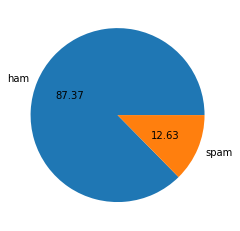

In [163]:
import matplotlib.pyplot as plt

plt.pie(df['target'].value_counts(),labels=['ham','spam'],autopct=('%.2f'))
plt.show()

In [164]:
!pip install nltk

In [165]:
import nltk

In [166]:
# downloading dependencies for nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\chatt\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [167]:
df.head()

,target,text
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [168]:
df['num_characters'] = df['text'].apply(len)
df.sample(5)

,target,text,num_characters
2859,0,I want to be there so i can kiss you and feel ...,60
4090,0,Hey doc pls I want to get nice t shirt for my ...,154
5313,0,My sister going to earn more than me da.,40
943,0,And also I've sorta blown him off a couple tim...,116
2047,0,No de. But call me after some time. Ill tell y...,50


In [169]:
df['num_words'] = df['text'].apply(lambda x:len(nltk.word_tokenize(x)))

In [170]:
df['num_sentences'] = df['text'].apply(lambda x:len(nltk.sent_tokenize(x)))

In [171]:
df.head()

,target,text,num_characters,num_words,num_sentences
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2
1,0,Ok lar... Joking wif u oni...,29,8,2
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2
3,0,U dun say so early hor... U c already then say...,49,13,1
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1


In [172]:
df[['num_characters','num_words','num_sentences']].describe()

,num_characters,num_words,num_sentences
count,5169.000000,5169.000000,5169.000000
mean,78.977945,18.453279,1.947185
std,58.236293,13.324793,1.362406
min,2.000000,1.000000,1.000000
25%,36.000000,9.000000,1.000000
50%,60.000000,15.000000,1.000000
75%,117.000000,26.000000,2.000000
max,910.000000,220.000000,28.000000


In [173]:
# stats for ham
df[df['target'] == 0][['num_characters','num_words','num_sentences']].describe()

,num_characters,num_words,num_sentences
count,4516.000000,4516.000000,4516.000000
mean,70.459256,17.120903,1.799601
std,56.358207,13.493725,1.278465
min,2.000000,1.000000,1.000000
25%,34.000000,8.000000,1.000000
50%,52.000000,13.000000,1.000000
75%,90.000000,22.000000,2.000000
max,910.000000,220.000000,28.000000


In [174]:
# stats for spam
df[df['target'] == 1][['num_characters','num_words','num_sentences']].describe()

,num_characters,num_words,num_sentences
count,653.000000,653.000000,653.000000
mean,137.891271,27.667688,2.967841
std,30.137753,7.008418,1.483201
min,13.000000,2.000000,1.000000
25%,132.000000,25.000000,2.000000
50%,149.000000,29.000000,3.000000
75%,157.000000,32.000000,4.000000
max,224.000000,46.000000,8.000000


In [175]:
import seaborn as sns

<AxesSubplot:xlabel='num_characters', ylabel='Count'>

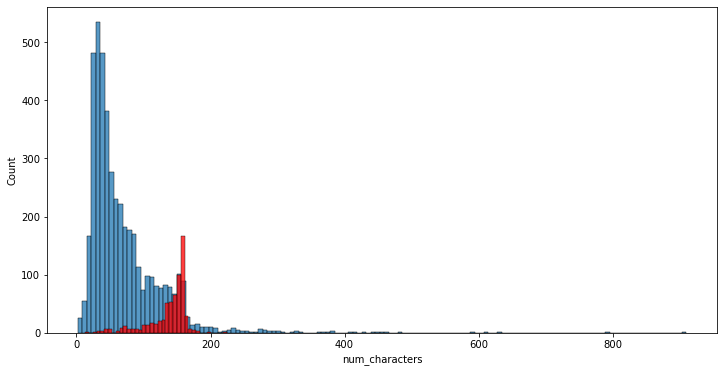

In [176]:
plt.figure(figsize=(12,6))
sns.histplot(df[df['target'] == 0]['num_characters'])
sns.histplot(df[df['target'] == 1]['num_characters'],color='red')

<AxesSubplot:xlabel='num_words', ylabel='Count'>

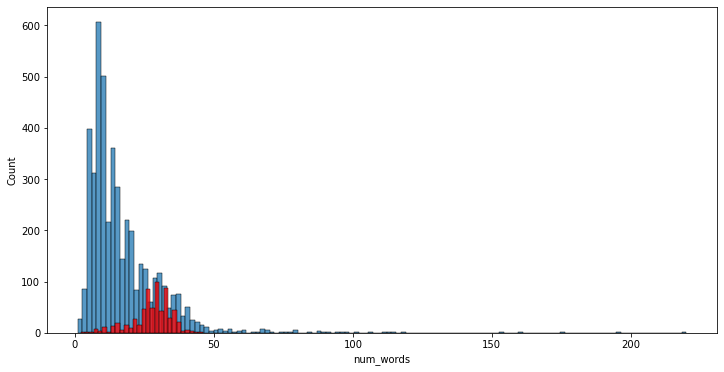

In [177]:
plt.figure(figsize=(12,6))
sns.histplot(df[df['target'] == 0]['num_words'])
sns.histplot(df[df['target'] == 1]['num_words'],color='red')

<AxesSubplot:>

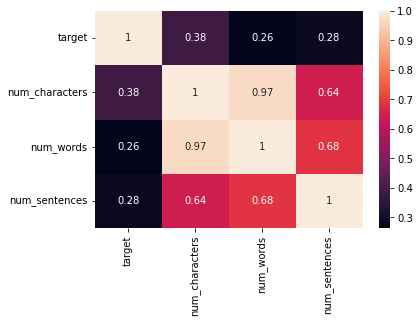

In [178]:
sns.heatmap(df.corr(),annot=True)

## Data Preprocessing
1. Lower case
2. Tokenization
3. Removing special characters
4. Removing stop words and punctuation
5. Stemming

In [179]:
nltk.download('stopwords')
from nltk.corpus import stopwords
stopwords = stopwords.words('english')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\chatt\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [180]:
len(stopwords)

179

In [181]:
import string
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [182]:
from nltk.stem.porter import PorterStemmer
from nltk.corpus import stopwords
import string

In [183]:
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [184]:
stopwords.words('english')

['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each

In [185]:
def text_transform(text):
    text = text.lower()
    text = nltk.word_tokenize(text)

    words_with_alnum = []
    for word in text:
        if word.isalnum():
            words_with_alnum.append(word)
            
    words = words_with_alnum[:]
    words_with_alnum.clear()
    for word in words:
        if word not in stopwords.words('english') and word not in string.punctuation:
            words_with_alnum.append(word)

    ps = PorterStemmer()
    words = words_with_alnum[:]
    words_with_alnum.clear()
    for word in words:
        words_with_alnum.append(ps.stem(word))
    return " ".join(words_with_alnum)

In [186]:
text_transform("Hi my name is Rahul, I'm a good learner! Are you liking me")

'hi name rahul good learner like'

In [187]:
df['tranformed_text'] = df['text'].apply(text_transform)

In [219]:
text = df['tranformed_text'][0:5].str.cat(sep=" ")

In [217]:
# !pip install wordcloud
# !pip install --upgrade pip
# !pip install --upgrade Pillow
# python3 -m PIL
# from wordcloud import WordCloud
# wc = WordCloud(height=500, width=500, background_color='white', min_font_size=10)
# spam_wc = wc.generate(df[df['target']==1]['tranformed_text'].str.cat(sep=" "))

In [221]:
df.head()

,target,text,num_characters,num_words,num_sentences,tranformed_text
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2,go jurong point crazi avail bugi n great world...
1,0,Ok lar... Joking wif u oni...,29,8,2,ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,free entri 2 wkli comp win fa cup final tkt 21...
3,0,U dun say so early hor... U c already then say...,49,13,1,u dun say earli hor u c alreadi say
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1,nah think goe usf live around though


In [239]:
spam_corpus = []
for msg in df[df['target']==1]['tranformed_text'].to_list():
    for word in msg.split():
        spam_corpus.append(word) 

In [240]:
len(spam_corpus)

9939

In [236]:
all_text = df[df['target']==1]['tranformed_text'].str.cat(sep=" ")
len(nltk.word_tokenize(all_text))

9939

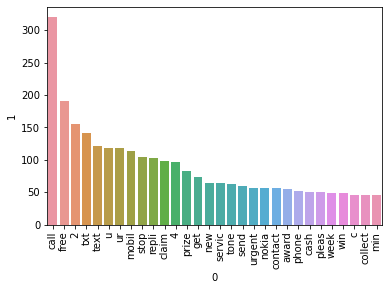

In [250]:
from collections import Counter
sns.barplot(x=pd.DataFrame(Counter(spam_corpus).most_common(30))[0],y=pd.DataFrame(Counter(spam_corpus).most_common(30))[1])
plt.xticks(rotation = 'vertical')
plt.show()

In [251]:
df.head()

,target,text,num_characters,num_words,num_sentences,tranformed_text
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2,go jurong point crazi avail bugi n great world...
1,0,Ok lar... Joking wif u oni...,29,8,2,ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,free entri 2 wkli comp win fa cup final tkt 21...
3,0,U dun say so early hor... U c already then say...,49,13,1,u dun say earli hor u c alreadi say
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1,nah think goe usf live around though


In [253]:
ham_texts = df[df['target']==0]['tranformed_text'].str.cat(sep=" ")

In [254]:
ham_words = nltk.word_tokenize(ham_texts)

In [257]:
len(ham_words)

35394

In [261]:
ham_commom_words = Counter(ham_words).most_common(30)

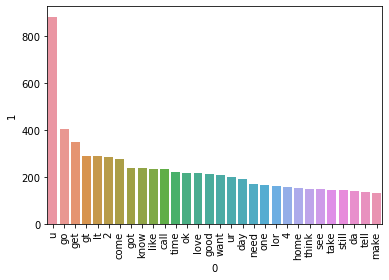

In [265]:
sns.barplot(x= pd.DataFrame(ham_commom_words)[0],y= pd.DataFrame(ham_commom_words)[1])
plt.xticks(rotation='vertical')
plt.show()

## Model Building

In [341]:
from sklearn.feature_extraction.text import  CountVectorizer, TfidfVectorizer
cv = CountVectorizer()
tfidf = TfidfVectorizer(max_features=3000)

In [342]:
x = tfidf.fit_transform(df['tranformed_text']).toarray()

In [343]:
y = df['target'].values

In [344]:
print(type(x))
print(type(y))

<class 'numpy.ndarray'>
<class 'numpy.ndarray'>


In [345]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=2)

In [346]:
from sklearn.naive_bayes import BernoulliNB,MultinomialNB,GaussianNB
bnb = BernoulliNB()
mnb = MultinomialNB()
gnb = GaussianNB()

In [347]:
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score
bnb.fit(X_train, y_train)
b_y_pred = bnb.predict(X_test)
print(accuracy_score(y_test, b_y_pred))
print(confusion_matrix(y_test, b_y_pred))
print(precision_score(y_test, b_y_pred))

0.9835589941972921
[[895   1]
 [ 16 122]]
0.991869918699187


In [350]:
mnb.fit(X_train, y_train)
m_y_pred = mnb.predict(X_test)
print(accuracy_score(y_test, m_y_pred))
print(confusion_matrix(y_test, m_y_pred))
print(precision_score(y_test, m_y_pred))

0.9709864603481625
[[896   0]
 [ 30 108]]
1.0


In [351]:
gnb.fit(X_train, y_train)
g_y_pred = gnb.predict(X_test)
print(accuracy_score(y_test, g_y_pred))
print(confusion_matrix(y_test, g_y_pred))
print(precision_score(y_test, g_y_pred))

0.8694390715667312
[[788 108]
 [ 27 111]]
0.5068493150684932


In [292]:
# tfidf -> mnb

In [352]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier

In [353]:
svc = SVC(kernel='sigmoid', gamma=1.0)
knc = KNeighborsClassifier()
mnb = MultinomialNB()
dtc = DecisionTreeClassifier(max_depth=5)
lrc = LogisticRegression(solver='liblinear',penalty='l1')
rfc = RandomForestClassifier(n_estimators=50,random_state=2)
abc = AdaBoostClassifier(n_estimators=50,random_state=2)
bc = BaggingClassifier(n_estimators=50,random_state=2)
etc = ExtraTreesClassifier(n_estimators=50,random_state=2)
gbdt = GradientBoostingClassifier(n_estimators=50,random_state=2)
xgb = XGBClassifier(n_estimators=50,random_state=2)

In [354]:
clfs =  {'SVC':svc,
         'KNN':knc,
         'NB':mnb,
         'DT':dtc,
         'LR':lrc,
         'RF':rfc,
         'AB':abc,
         'BC':bc,
         'ETC':etc,
         'GB': gbdt,
         'XGB':xgb}

In [355]:
def train_classifier(clf, X_train, y_train, X_test, y_test):
    clf.fit(X_train,y_train)
    y_pred = clf.predict(X_test)
    accuracy = accuracy_score(y_test,y_pred)
    precision = precision_score(y_test,y_pred)
    return accuracy, precision

In [356]:
train_classifier(mnb,X_train, y_train, X_test, y_test)

(0.9709864603481625, 1.0)

In [357]:
accuracy_scores = []
precision_scores = []

for name, clf in clfs.items():
    current_accuracy, current_precision = train_classifier(clf,X_train, y_train, X_test, y_test)
    print(name, " => ", current_accuracy," , ",current_precision)

    accuracy_scores.append(current_accuracy)
    precision_scores.append(current_precision)


SVC  =>  0.9758220502901354  ,  0.9747899159663865
KNN  =>  0.9052224371373307  ,  1.0
NB  =>  0.9709864603481625  ,  1.0
DT  =>  0.9303675048355899  ,  0.8173076923076923
LR  =>  0.9584139264990329  ,  0.9702970297029703
RF  =>  0.9748549323017408  ,  0.9827586206896551
AB  =>  0.960348162475822  ,  0.9292035398230089
BC  =>  0.9574468085106383  ,  0.8671875
ETC  =>  0.9748549323017408  ,  0.9745762711864406
GB  =>  0.9477756286266924  ,  0.92
XGB  =>  0.971953578336557  ,  0.943089430894309


In [358]:
precision_scores

[0.9747899159663865,
 1.0,
 1.0,
 0.8173076923076923,
 0.9702970297029703,
 0.9827586206896551,
 0.9292035398230089,
 0.8671875,
 0.9745762711864406,
 0.92,
 0.943089430894309]

In [321]:
clfs

{'SVC': SVC(gamma=1.0, kernel='sigmoid'),
 'KNN': KNeighborsClassifier(),
 'NB': MultinomialNB(),
 'DT': DecisionTreeClassifier(max_depth=5),
 'LR': LogisticRegression(penalty='l1', solver='liblinear'),
 'RF': RandomForestClassifier(n_estimators=50, random_state=2),
 'AB': AdaBoostClassifier(random_state=2),
 'BC': BaggingClassifier(n_estimators=50, random_state=2),
 'ETC': ExtraTreesClassifier(n_estimators=50, random_state=2),
 'GB': GradientBoostingClassifier(n_estimators=50, random_state=2),
 'XGB': XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
               colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
               early_stopping_rounds=None, enable_categorical=False,
               eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
               importance_type=None, interaction_constraints='',
               learning_rate=0.300000012, max_bin=256, max_cat_to_onehot=4,
               max_delta_step=0, max_depth=6, max_leaves=0, min_

In [339]:
clf_type = list(clfs.keys())
models_df = pd.DataFrame({'Algorithm':clf_type,'Accuracy':accuracy_scores,'Precision':precision_scores})

In [359]:
models_df.sort_values(by='Precision',ascending=False,inplace=True)

In [361]:
test = models_df.copy()

In [362]:
test

,Algorithm,Accuracy,Precision
1,KNN,0.900387,1.000000
2,NB,0.959381,1.000000
5,RF,0.973888,1.000000
8,ETC,0.975822,0.982906
0,SVC,0.972921,0.974138
6,AB,0.961315,0.945455
4,LR,0.951644,0.940000
10,XGB,0.969052,0.934426
9,GB,0.952611,0.923810
7,BC,0.958414,0.862595


In [365]:
pd.concat([models_df,pd.DataFrame({'Accuracy_maxd_3000':accuracy_scores,'Precision_maxd_3000':precision_scores})],axis=1)

,Algorithm,Accuracy,Precision,Accuracy_maxd_3000,Precision_maxd_3000
1,KNN,0.900387,1.000000,0.905222,1.000000
2,NB,0.959381,1.000000,0.970986,1.000000
5,RF,0.973888,1.000000,0.974855,0.982759
8,ETC,0.975822,0.982906,0.974855,0.974576
0,SVC,0.972921,0.974138,0.975822,0.974790
6,AB,0.961315,0.945455,0.960348,0.929204
4,LR,0.951644,0.940000,0.958414,0.970297
10,XGB,0.969052,0.934426,0.971954,0.943089
9,GB,0.952611,0.923810,0.947776,0.920000
7,BC,0.958414,0.862595,0.957447,0.867188
